# Project Objective:
Regression problem aimed to predict the median house prices for district blocks in California. The dataset used is a publicly available kaggle dataset. https://www.kaggle.com/datasets/camnugent/california-housing-prices

# Exploratory Data Analysis

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import numpy as np
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
def load_data(file_path):
    return pd.read_csv(file_path)

In [3]:
housing = load_data('data/housing.csv')
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<li> There is a total of 20k records which is fairly a small dataset in terms of machine learning standards. </li>
<li> There are some missing records in total_bedrooms feature </li>
<li> There are a total of 9 numerical features </li>
<li> There is 1 categorical feature</li>

### Todo data cleaning:
<li> Handle missing records in total bedrooms </li>

### Exploration of numerical features

In [5]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

<li> The median income is not in absolute number. It is scaled. </li>

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

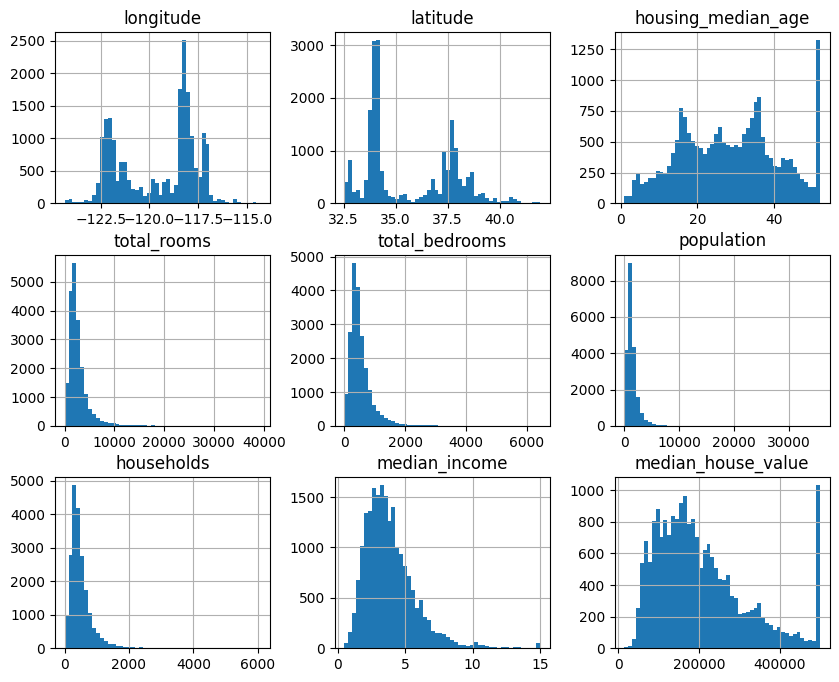

In [6]:
housing.hist(bins=50, figsize=(10,8))

<li> The median_income is scaled and the minimum and maximum is scaled at 0.5 and and 15. We could assume that these numbers are in tens of thousands. </li>
<li> Looks like both housing_median_age and median_house_value are capped as well. </li>
<li> The numerical features range are too diverse. For a learning algorithm to work better, the features range must be in comparable range </li>
<li> Many featuers are right skewed. This might make it hard for the machine learning algorithms to detect patterns. </li>

### Todo data cleaning:
<li> Handle missing records in total bedrooms </li>
<li> Feature scale numerical features</li>
<li> Transform numerical features total_rooms, total_bedrooms, population and households to have a more bell shaped like histogram </li>

### Exploration of categorical features

<Axes: xlabel='ocean_proximity'>

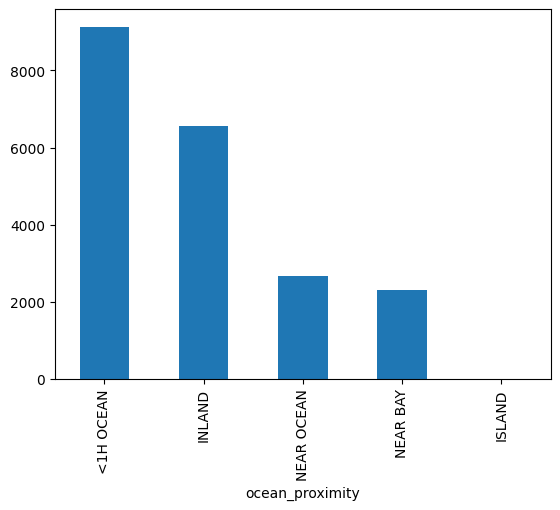

In [7]:
housing['ocean_proximity'].value_counts().plot(kind='bar')

### Train-CV-Test Split
Let's split the dataset into train, cross-validation and test splits before doing any data transformation and further exploration.

In [8]:
training, validation_test = train_test_split(housing, test_size=0.3, random_state=42)
validation, testing = train_test_split(validation_test, test_size=0.5, random_state=42)

training.shape, validation.shape, testing.shape

((14448, 10), (3096, 10), (3096, 10))

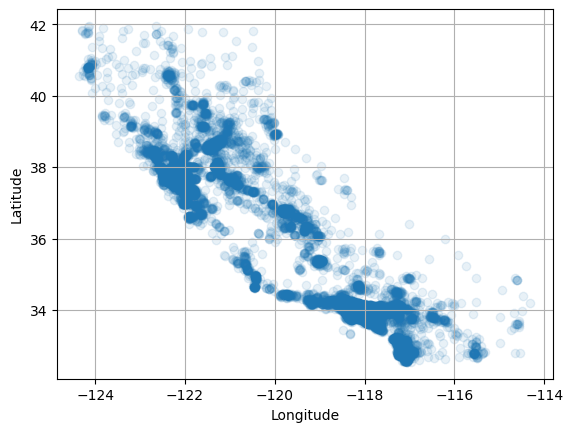

In [9]:
plt.scatter(training['longitude'], training['latitude'], alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

The above plot clearly shows high density areas such as the Bay Area and San Diego.

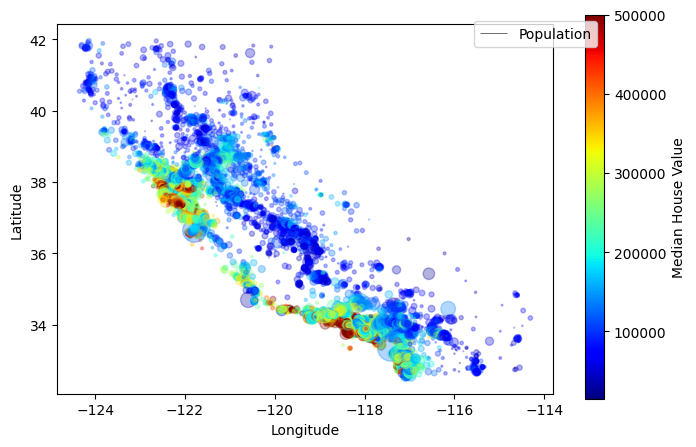

In [10]:
# Normalize the median_house_value for color mapping
norm = Normalize(vmin=housing['median_house_value'].min(), vmax=housing['median_house_value'].max())
cmap = cm.jet  # Colormap for color mapping

# Plot the scatter plot with color mapping and size based on population
fig, ax = plt.subplots()
sc = ax.scatter(housing['longitude'], housing['latitude'], alpha=0.3, s=housing['population']/100,
                c=housing['median_house_value'], cmap=cmap, norm=norm)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Create a colorbar using the ScalarMappable object
cbar_ax = fig.add_axes([0.95, 0.1, 0.03, 0.8])  # [left, bottom, width, height]
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
cbar.set_label('Median House Value')

# Create a legend for the marker sizes
plt.legend(['Population'])

plt.show()

<li> In the above plot, the radius of each circle represents the population of the district </li>
<li> The color distinguishes the median house value </li>
<li> House close to the ocean have high prices and is very much related to the population. </li>

### Todo data cleaning:
<li> Handle missing records in total bedrooms </li>
<li> Feature scale numerical features</li>
<li> Transform numerical features total_rooms, total_bedrooms, population and households to have a more bell shaped like histogram </li>
<li> Perform clustering on the data and add distances to the centre of each cluster as new features </li>

### Correlation Analysis

In [11]:
numerical_features = training.select_dtypes(include=['int64', 'float64']).columns

In [12]:
numerical_features

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

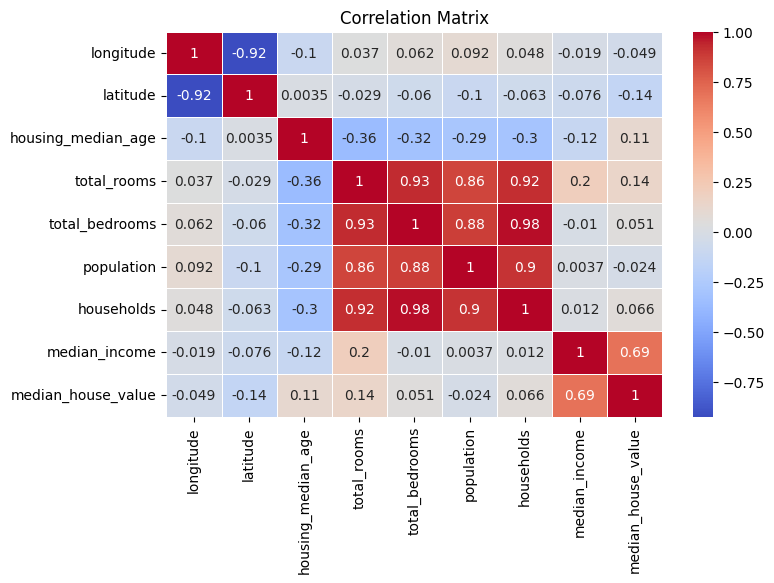

In [13]:
corr_matrix = training[numerical_features].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Median house value has a positive correlation with median_incoem, total_rooms, housing_median_age(surprisingly a positive correlation), households

### Todo data cleaning:
<li> Handle missing records in total bedrooms </li>
<li> Feature scale numerical features</li>
<li> Transform numerical features total_rooms, total_bedrooms, population and households to have a more bell shaped like histogram </li>
<li> Perform clustering on the data and add distances to the centre of each cluster as new features </li>
<li> Try performing PCA on the data to handle multi-collinearity observed </li>

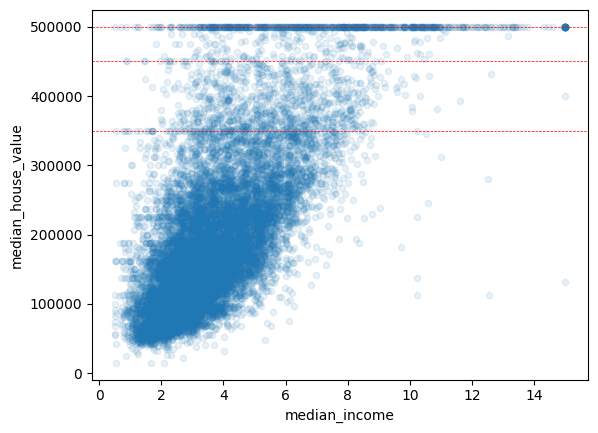

In [14]:
training.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.axhline(y=350000, color='red', linestyle='--', linewidth=0.51)
plt.axhline(y=500000, color='red', linestyle='--', linewidth=0.51)
plt.axhline(y=450000, color='red', linestyle='--', linewidth=0.51)

### Todo data cleaning:
<li> Handle missing records in total bedrooms </li>
<li> Feature scale numerical features</li>
<li> Transform numerical features total_rooms, total_bedrooms, population and households to have a more bell shaped like histogram </li>
<li> Perform clustering on the data and add distances to the centre of each cluster as new features </li>
<li> Try performing PCA on the data to handle multi-collinearity observed </li>
<li> There seems to be few apparent lines at around 500k, 450k, 350k. Since there is high correlation between median_income and median_house_value we should remove these values from dataset to prevent the model from replicating this pattern </li>

### Feature Engineering

In [15]:
training.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [16]:
# Let's try combinig attributes and see how they are correlated with the house value
class CombinedAttribuesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, room_index=3, bedroom_index=4, population_index=5, household_index=6):
        self.room_index = room_index
        self.bedroom_index = bedroom_index
        self.population_index = population_index
        self.household_index = household_index
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, self.room_index]/X[:, self.household_index]
        population_per_household = X[:, self.population_index]/X[:, self.household_index]
        return np.c_[X, rooms_per_household, population_per_household]
        

In [17]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_log_transform=[]):
        self.columns_to_log_transform = columns_to_log_transform
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        for each in self.columns_to_log_transform:
            X[:, each] = np.log1p(X[:, each])
        return X

Text(0.5, 1.0, 'Log-Transformed Matrix')

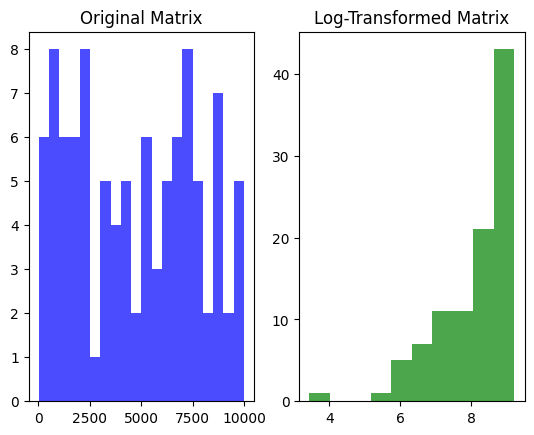

In [18]:
# testing the log_transformer
X = np.random.uniform(1, 10000, (100, 1))
X_orig = X.copy()
log_transformer = LogTransformer(columns_to_log_transform=[0])
log_X = log_transformer.transform(X)
fig, ax = plt.subplots(1,2)
ax[0].hist(X_orig, bins=20, color='blue', alpha=0.7)
ax[0].set_title('Original Matrix')

# Histogram of the log-transformed matrix
ax[1].hist(log_X, bins=10, color='green', alpha=0.7)
ax[1].set_title('Log-Transformed Matrix')

In [19]:
# let's split all the datasets into corresponding features and labels
training_X = training.drop(['median_house_value'], axis=1)
training_y = training['median_house_value'].values
validation_X = validation.drop(['median_house_value'], axis=1)
validation_y = validation['median_house_value'].values
testing_X = testing.drop(['median_house_value'], axis=1)
testing_y = testing['median_house_value'].values

In [20]:
numerical_features = list(training_X.select_dtypes(include=['int64', 'float64']).columns)
categorical_features = ['ocean_proximity']

### Data cleaning resolutions:
<li> Handle missing records in total bedrooms -- <b> Impute with median </b> </li>
<li> Feature scale numerical features -- <b> Feature scale with standardization </b></li>
<li> Transform numerical features total_rooms, total_bedrooms, population and households to have a more bell shaped like histogram -- <b> Log transform them </b> </li>
<li> Encode categorical feature ocean_proximity -- <b> Use Ordinal Encoder </b> </li>
<li> Perform clustering on the data and add distances to the centre of each cluster as new features </li>
<li> Try performing PCA on the data to handle multi-collinearity observed </li>

In [21]:
# let's build a pipeline to handle transformation on numerical features and then build a full transformer
# to handle both numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attributes_adder', CombinedAttribuesAdder()),
    ('log_transformer',LogTransformer(columns_to_log_transform=[3,4,5,6])),
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", numerical_pipeline, numerical_features),
    ("cat", OneHotEncoder(), categorical_features)
])

In [22]:
training_X_prepared = full_pipeline.fit_transform(training_X)

In [23]:
training_X_prepared.shape

(14448, 15)

### Linear Regression Model

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(training_X_prepared, training_y)

LinearRegression()

In [25]:
housing_predictions = lin_reg.predict(full_pipeline.transform(validation_X))

In [26]:
mape = mean_absolute_percentage_error(validation_y, housing_predictions)
mse = mean_squared_error(validation_y, housing_predictions)
print(f'Mean Absolution % Error: {mape}, Root Mean Squared Error: {np.sqrt(mse)}')

Mean Absolution % Error: 0.2933373411928861, Root Mean Squared Error: 68333.09378092819


### Random Forest Regressor

In [27]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(training_X_prepared, training_y)
predictions_rf = rf_regressor.predict(full_pipeline.transform(validation_X))

In [28]:
mape = mean_absolute_percentage_error(validation_y, predictions_rf)
mse = mean_squared_error(validation_y, predictions_rf)
print(f'Mean Absolution % Error: {mape}, Root Mean Squared Error: {np.sqrt(mse)}')

Mean Absolution % Error: 0.18349818831093592, Root Mean Squared Error: 51053.79332273024


### XGB Regressor

In [29]:
xgb_regressor = XGBRegressor(objective='reg:squarederror')
xgb_regressor.fit(training_X_prepared, training_y)
predictons_xgb = xgb_regressor.predict(full_pipeline.transform(validation_X))

In [30]:
mape = mean_absolute_percentage_error(validation_y, predictons_xgb)
mse = mean_squared_error(validation_y, predictons_xgb)
print(f'Mean Absolution % Error: {mape}, Root Mean Squared Error: {np.sqrt(mse)}')

Mean Absolution % Error: 0.1729115310024705, Root Mean Squared Error: 46992.52641371898


### Based on all the three models, XGBRegressor works best with the lowest RMSE. 

In [31]:
# let's try tuning the hyper parameter of XGBoostRegressor to improve its performance
param_grid = {
    'xgb__n_estimators': [100, 200, 300, 400, 500],
    'xgb__max_depth': [3,4,5,6,7],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__subsample': [0.7, 0.8, 0.9],
    'xgb__colsample_bytree': [0.7, 0.8, 0.9]
}

In [32]:
pipeline_xgb = Pipeline([
    ('preprocessor', full_pipeline),
    ('xgb', XGBRegressor())
])

In [33]:
grid_search = GridSearchCV(pipeline_xgb, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(training_X, training_y)

Fitting 3 folds for each of 675 candidates, totalling 2025 fits
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.7; total time=   0.2s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=300, xgb__subsample=0.7; total time=   0.2s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=300, xgb__subsample=0.9; total time=   0.2s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=400, xgb__subsample=0.9; total time=   0.3s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=500, xgb__subsample=0.9; total time=   0.3s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_esti

[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.7; total time=   0.1s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=300, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=400, xgb__subsample=0.7; total time=   0.3s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=500, xgb__subsample=0.7; total time=   0.4s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100, xgb__subsample=0.7; total time=   0.1s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100, xgb__subsample=0.9; total time=   0.1s
[CV] END xgb_

[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=300, xgb__subsample=0.7; total time=   0.3s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=400, xgb__subsample=0.8; total time=   0.3s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=500, xgb__subsample=0.7; total time=   0.3s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100, xgb__subsample=0.7; total time=   0.1s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100, xgb__subsample=0.9; total time=   0.2s
[CV] END xgb_

[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.9; total time=   0.1s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.9; total time=   0.2s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=300, xgb__subsample=0.9; total time=   0.2s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=400, xgb__subsample=0.8; total time=   0.3s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=500, xgb__subsample=0.8; total time=   0.3s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100, xgb__subsample=0.7; total time=   0.1s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100, xgb__subsample=0.9; total time=   0.1s
[CV] END xgb_

[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.7; total time=   0.2s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.7; total time=   0.2s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=300, xgb__subsample=0.7; total time=   0.2s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=400, xgb__subsample=0.7; total time=   0.3s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=400, xgb__subsample=0.9; total time=   0.3s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=500, xgb__subsample=0.9; total time=   0.4s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=200, xgb__subsample=0.7; total time=   0.2s
[CV] END xgb_

[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.7; total time=   0.1s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.7; total time=   0.2s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=300, xgb__subsample=0.8; total time=   0.3s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=400, xgb__subsample=0.7; total time=   0.3s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=500, xgb__subsample=0.7; total time=   0.4s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=500, xgb__subsample=0.9; total time=   0.4s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=200, xgb__subsample=0.9; total time=   0.2s
[CV] END xgb_

[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.9; total time=   0.2s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=300, xgb__subsample=0.9; total time=   0.2s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=400, xgb__subsample=0.9; total time=   0.3s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=500, xgb__subsample=0.8; total time=   0.4s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attributes_adder',
                                                                                          CombinedAttribuesAdder()),
                                                                                         ('log_transformer',
                                                                                          LogTransformer(columns_to_log_transform=[3,
                                                                                                                                   4,
                                                                                                                                   5,
                                                                                                                                   6])),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median...
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.7, 0.8, 0.9],
                         'xgb__learning_rate': [0.01, 0.05, 0.1],
                         'xgb__max_depth': [3, 4, 5, 6, 7],
                         'xgb__n_estimators': [100, 200, 300, 400, 500],
                         'xgb__subsample': [0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error', verbose=2)

In [34]:
# best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 7, 'xgb__n_estimators': 500, 'xgb__subsample': 0.9}
-2106346573.5747852


In [35]:
# best estimator
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attributes_adder',
                                                                   CombinedAttribuesAdder()),
                                                                  ('log_transformer',
                                                                   LogTransformer(columns_to_log_transform=[3,
                                                                                                            4,
                                                                                                            5,
                                                                                                            6])),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_b...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [36]:
cv_res = grid_search.cv_results_
for score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(np.sqrt(-score), params)

79656.48370498045 {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.7}
79657.88969109663 {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.8}
79690.81123024432 {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.9}
66674.85129918225 {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__subsample': 0.7}
66722.2879181891 {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}
66777.32038790964 {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__subsample': 0.9}
61136.645423512025 {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators':

In [37]:
# let's look at the feature importances of the best estimator
final_model = grid_search.best_estimator_
xg_boost_model = final_model.named_steps['xgb']

In [38]:
final_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attributes_adder',
                                                                   CombinedAttribuesAdder()),
                                                                  ('log_transformer',
                                                                   LogTransformer(columns_to_log_transform=[3,
                                                                                                            4,
                                                                                                            5,
                                                                                                            6])),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_b...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [39]:
xg_boost_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
feature_importances = xg_boost_model.feature_importances_
feature_importances

array([0.02949548, 0.03075471, 0.01521001, 0.00594857, 0.00793913,
       0.00754104, 0.00725201, 0.1305858 , 0.04291394, 0.03582556,
       0.05452032, 0.48419818, 0.02880814, 0.0637686 , 0.0552385 ],
      dtype=float32)

In [41]:
num_features = numerical_features + ['rooms_per_household', 'population_per_household']
cat_feature_names = final_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
feature_names = num_features + list(cat_feature_names)

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

Feature  Importance
11      ocean_proximity_INLAND    0.484198
7                median_income    0.130586
13    ocean_proximity_NEAR BAY    0.063769
14  ocean_proximity_NEAR OCEAN    0.055238
10   ocean_proximity_<1H OCEAN    0.054520
8          rooms_per_household    0.042914
9     population_per_household    0.035826
1                     latitude    0.030755
0                    longitude    0.029495
12      ocean_proximity_ISLAND    0.028808
2           housing_median_age    0.015210
4               total_bedrooms    0.007939
5                   population    0.007541
6                   households    0.007252
3                  total_rooms    0.005949

### Evaluation on test set

In [42]:
predictons_final = final_model.predict(testing_X)

In [43]:
mape = mean_absolute_percentage_error(testing_y, predictons_final)
mse = mean_squared_error(testing_y, predictons_final)
print(f'Mean Absolution % Error: {mape}, Root Mean Squared Error: {np.sqrt(mse)}')

Mean Absolution % Error: 0.15844195018128124, Root Mean Squared Error: 42119.337569170275


# Observations:
<li> Whether the house is in proximity to ocean_proximity[inland] is the number one predictor of housing prices </li>
<li> Median income contributes to about 13% importance in house price prediction </li>
<li> The model could be used as a tool to predict house prices with an average error of + or - 42k USD </li>